# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import itertools

import matplotlib.pyplot as plt

## Import Data

### Fisheries Data

In [2]:
# Import data
df = pd.read_csv("capture_quantity.csv", delimiter = ",")

df.head()

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,AREA.CODE,MEASURE,PERIOD,VALUE,STATUS
0,4,FRF,4,Q_tlw,2022,2000.0,I
1,4,FRF,4,Q_tlw,2021,1800.0,I
2,4,FRF,4,Q_tlw,2020,2000.0,I
3,4,FRF,4,Q_tlw,2019,2100.0,I
4,4,FRF,4,Q_tlw,2018,2050.0,I


In [3]:
# Filter to only marine fishes
remove = [1, 2, 3, 4, 5, 6, 7]
df_marine = df[~df["AREA.CODE"].isin(remove)]
df_marine.reset_index(drop = True, inplace = True)

df_marine.head()

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,AREA.CODE,MEASURE,PERIOD,VALUE,STATUS
0,8,ELE,37,Q_tlw,2011,3.0,A
1,8,ELE,37,Q_tlw,2010,4.0,I
2,8,ELE,37,Q_tlw,2009,4.0,A
3,8,ELE,37,Q_tlw,2008,5.0,A
4,8,ELE,37,Q_tlw,2007,3.0,A


In [4]:
# Drop columns that are not needed (area code and measurement unit)
df_marine = df_marine.drop(columns = ["AREA.CODE", "MEASURE"])

df_marine.head()

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,PERIOD,VALUE,STATUS
0,8,ELE,2011,3.0,A
1,8,ELE,2010,4.0,I
2,8,ELE,2009,4.0,A
3,8,ELE,2008,5.0,A
4,8,ELE,2007,3.0,A


In [5]:
# Add species name for every data in df_marine
df_species = pd.read_csv("species_groups.csv", delimiter = ",")
df_species = df_species[["3A_Code", "Name_En"]]

df_marine.rename(columns = {"SPECIES.ALPHA_3_CODE": "3A_Code"}, inplace = True)
df_marine = df_marine.merge(df_species, on = "3A_Code", how = "left")
df_marine.rename(columns = {"Name_En": "Species"}, inplace = True)

# Add country name for every data in df_marine
df_country = pd.read_csv("country_groups.csv", delimiter = ",")
df_country = df_country[["UN_Code", "Name_En"]]

df_marine.rename(columns = {"COUNTRY.UN_CODE": "UN_Code"}, inplace = True)
df_marine = df_marine.merge(df_country, on = "UN_Code", how = "left")
df_marine.rename(columns = {"Name_En": "Country"}, inplace = True)
df_marine.head()

,UN_Code,3A_Code,PERIOD,VALUE,STATUS,Species,Country
0,8,ELE,2011,3.0,A,European eel,Albania
1,8,ELE,2010,4.0,I,European eel,Albania
2,8,ELE,2009,4.0,A,European eel,Albania
3,8,ELE,2008,5.0,A,European eel,Albania
4,8,ELE,2007,3.0,A,European eel,Albania


In [6]:
# Filter to only Southeast Asian countries
df_marine = df_marine[df_marine["UN_Code"].isin([96, 104, 116, 626, 360, 418, 458, 608, 702, 764, 704])]
df_marine["Country"].unique()

# # Filter to only data from 2003 - 2022
# df_marine = df_marine[df_marine["PERIOD"].between(2003, 2022)]

# years = set(range(2003, 2023))
# def has_all_years(group):
#     return years.issubset(set(group["PERIOD"]))

# df_marine = (df_marine.groupby(["Country", "Species"]).filter(has_all_years))
df_marine = df_marine.reset_index(drop = True)

In [7]:
# all unique fish items
df_fishes = df_marine[["3A_Code", "Species"]].drop_duplicates().reset_index(drop=True)
df_fishes.head()

,3A_Code,Species
0,CHG,Chacunda gizzard shad
1,HAI,Indian halibut
2,TAI,Indo-Pacific tarpon
3,LIX,Lizardfishes nei
4,CAX,Sea catfishes nei


In [8]:
print(df_marine.shape)

(46858, 7)


### SST Summary Data

In [9]:
sst2003_summary = pd.read_csv("sst2003_summary.csv", delimiter = ",")
df_marine_2003 = df_marine[df_marine["PERIOD"] == 2003]
df_marine_2003 = pd.merge(df_marine_2003, sst2003_summary, on = ["Country"])

sst2004_summary = pd.read_csv("sst2004_summary.csv", delimiter = ",")
df_marine_2004 = df_marine[df_marine["PERIOD"] == 2004]
df_marine_2004 = pd.merge(df_marine_2004, sst2004_summary, on = ["Country"])

sst2005_summary = pd.read_csv("sst2005_summary.csv", delimiter = ",")
df_marine_2005 = df_marine[df_marine["PERIOD"] == 2005]
df_marine_2005 = pd.merge(df_marine_2005, sst2005_summary, on = ["Country"])

sst2006_summary = pd.read_csv("sst2006_summary.csv", delimiter = ",")
df_marine_2006 = df_marine[df_marine["PERIOD"] == 2006]
df_marine_2006 = pd.merge(df_marine_2006, sst2006_summary, on = ["Country"])

sst2007_summary = pd.read_csv("sst2007_summary.csv", delimiter = ",")
df_marine_2007 = df_marine[df_marine["PERIOD"] == 2007]
df_marine_2007 = pd.merge(df_marine_2007, sst2007_summary, on = ["Country"])

sst2008_summary = pd.read_csv("sst2008_summary.csv", delimiter = ",")
df_marine_2008 = df_marine[df_marine["PERIOD"] == 2008]
df_marine_2008 = pd.merge(df_marine_2008, sst2008_summary, on = ["Country"])

sst2009_summary = pd.read_csv("sst2009_summary.csv", delimiter = ",")
df_marine_2009 = df_marine[df_marine["PERIOD"] == 2009]
df_marine_2009 = pd.merge(df_marine_2009, sst2009_summary, on = ["Country"])

sst2010_summary = pd.read_csv("sst2010_summary.csv", delimiter = ",")
df_marine_2010 = df_marine[df_marine["PERIOD"] == 2010]
df_marine_2010 = pd.merge(df_marine_2010, sst2010_summary, on = ["Country"])

sst2011_summary = pd.read_csv("sst2011_summary.csv", delimiter = ",")
df_marine_2011 = df_marine[df_marine["PERIOD"] == 2011]
df_marine_2011 = pd.merge(df_marine_2011, sst2011_summary, on = ["Country"])

sst2012_summary = pd.read_csv("sst2012_summary.csv", delimiter = ",")
df_marine_2012 = df_marine[df_marine["PERIOD"] == 2012]
df_marine_2012 = pd.merge(df_marine_2012, sst2012_summary, on = ["Country"])

sst2013_summary = pd.read_csv("sst2013_summary.csv", delimiter = ",")
df_marine_2013 = df_marine[df_marine["PERIOD"] == 2013]
df_marine_2013 = pd.merge(df_marine_2013, sst2013_summary, on = ["Country"])

sst2014_summary = pd.read_csv("sst2014_summary.csv", delimiter = ",")
df_marine_2014 = df_marine[df_marine["PERIOD"] == 2014]
df_marine_2014 = pd.merge(df_marine_2014, sst2014_summary, on = ["Country"])

sst2015_summary = pd.read_csv("sst2015_summary.csv", delimiter = ",")
df_marine_2015 = df_marine[df_marine["PERIOD"] == 2015]
df_marine_2015 = pd.merge(df_marine_2015, sst2015_summary, on = ["Country"])

sst2016_summary = pd.read_csv("sst2016_summary.csv", delimiter = ",")
df_marine_2016 = df_marine[df_marine["PERIOD"] == 2016]
df_marine_2016 = pd.merge(df_marine_2016, sst2016_summary, on = ["Country"])

sst2017_summary = pd.read_csv("sst2017_summary.csv", delimiter = ",")
df_marine_2017 = df_marine[df_marine["PERIOD"] == 2017]
df_marine_2017 = pd.merge(df_marine_2017, sst2017_summary, on = ["Country"])

sst2018_summary = pd.read_csv("sst2018_summary.csv", delimiter = ",")
df_marine_2018 = df_marine[df_marine["PERIOD"] == 2018]
df_marine_2018 = pd.merge(df_marine_2018, sst2018_summary, on = ["Country"])

sst2019_summary = pd.read_csv("sst2019_summary.csv", delimiter = ",")
df_marine_2019 = df_marine[df_marine["PERIOD"] == 2019]
df_marine_2019 = pd.merge(df_marine_2019, sst2019_summary, on = ["Country"])

sst2020_summary = pd.read_csv("sst2020_summary.csv", delimiter = ",")
df_marine_2020 = df_marine[df_marine["PERIOD"] == 2020]
df_marine_2020 = pd.merge(df_marine_2020, sst2020_summary, on = ["Country"])

sst2021_summary = pd.read_csv("sst2021_summary.csv", delimiter = ",")
df_marine_2021 = df_marine[df_marine["PERIOD"] == 2021]
df_marine_2021 = pd.merge(df_marine_2021, sst2021_summary, on = ["Country"])

sst2022_summary = pd.read_csv("sst2022_summary.csv", delimiter = ",")
df_marine_2022 = df_marine[df_marine["PERIOD"] == 2022]
df_marine_2022 = pd.merge(df_marine_2022, sst2022_summary, on = ["Country"])

In [10]:
# Concatenate all marine + SST dataset
df_list = [df_marine_2003, df_marine_2004, df_marine_2005, df_marine_2006, df_marine_2007, 
           df_marine_2008, df_marine_2009, df_marine_2010, df_marine_2011, df_marine_2012, 
           df_marine_2013, df_marine_2014, df_marine_2015, df_marine_2016, df_marine_2017, 
           df_marine_2018, df_marine_2019, df_marine_2020, df_marine_2021, df_marine_2022]

df_marine = pd.concat(df_list, ignore_index = True)
df_marine.head()

,UN_Code,3A_Code,PERIOD,VALUE,STATUS,Species,Country,Mean SST,Min SST,Max SST
0,116,TUX,2003,0.000,I,Tuna-like fishes nei,Cambodia,29.600625,28.44,31.8
1,116,MZZ,2003,33228.693,I,Marine fishes nei,Cambodia,29.600625,28.44,31.8
2,116,CRA,2003,4529.350,I,Marine crabs nei,Cambodia,29.600625,28.44,31.8
3,116,DCP,2003,12111.089,I,Natantian decapods nei,Cambodia,29.600625,28.44,31.8
4,116,CEP,2003,2756.996,I,Cephalopods nei,Cambodia,29.600625,28.44,31.8


In [11]:
df_marine = df_marine[["PERIOD", "Species", "Country", "VALUE", "Mean SST", "Min SST", "Max SST"]]
df_marine.head()

,PERIOD,Species,Country,VALUE,Mean SST,Min SST,Max SST
0,2003,Tuna-like fishes nei,Cambodia,0.000,29.600625,28.44,31.8
1,2003,Marine fishes nei,Cambodia,33228.693,29.600625,28.44,31.8
2,2003,Marine crabs nei,Cambodia,4529.350,29.600625,28.44,31.8
3,2003,Natantian decapods nei,Cambodia,12111.089,29.600625,28.44,31.8
4,2003,Cephalopods nei,Cambodia,2756.996,29.600625,28.44,31.8


## Plot for SST 2011 - 2019

In [12]:
sst2003_summary["PERIOD"] = 2003
sst2004_summary["PERIOD"] = 2004
sst2005_summary["PERIOD"] = 2005
sst2006_summary["PERIOD"] = 2006
sst2007_summary["PERIOD"] = 2007
sst2008_summary["PERIOD"] = 2008
sst2009_summary["PERIOD"] = 2009
sst2010_summary["PERIOD"] = 2010
sst2011_summary["PERIOD"] = 2011
sst2012_summary["PERIOD"] = 2012
sst2013_summary["PERIOD"] = 2013
sst2014_summary["PERIOD"] = 2014
sst2015_summary["PERIOD"] = 2015
sst2016_summary["PERIOD"] = 2016
sst2017_summary["PERIOD"] = 2017
sst2018_summary["PERIOD"] = 2018
sst2019_summary["PERIOD"] = 2019
sst2020_summary["PERIOD"] = 2020
sst2021_summary["PERIOD"] = 2021
sst2022_summary["PERIOD"] = 2022

In [13]:
# Concatenate all sst dataset
df_list = [sst2003_summary, sst2004_summary, sst2005_summary, sst2006_summary, sst2007_summary, 
           sst2008_summary, sst2009_summary, sst2010_summary, sst2011_summary, sst2012_summary, 
           sst2013_summary, sst2014_summary, sst2015_summary, sst2016_summary, sst2017_summary, 
           sst2018_summary, sst2019_summary, sst2020_summary, sst2021_summary, sst2022_summary]

df_sst = pd.concat(df_list, ignore_index = True)

df_sst.to_csv("SST Summary (Compiled).csv", index = False)
df_sst.head()

,Country,Mean SST,Min SST,Max SST,PERIOD
0,Brunei,29.400737,26.26,32.23,2003
1,Cambodia,29.600625,28.44,31.80,2003
2,East Timor,29.201174,26.84,32.96,2003
3,Indonesia,29.164124,22.18,33.98,2003
4,Malaysia,29.600197,25.24,33.83,2003


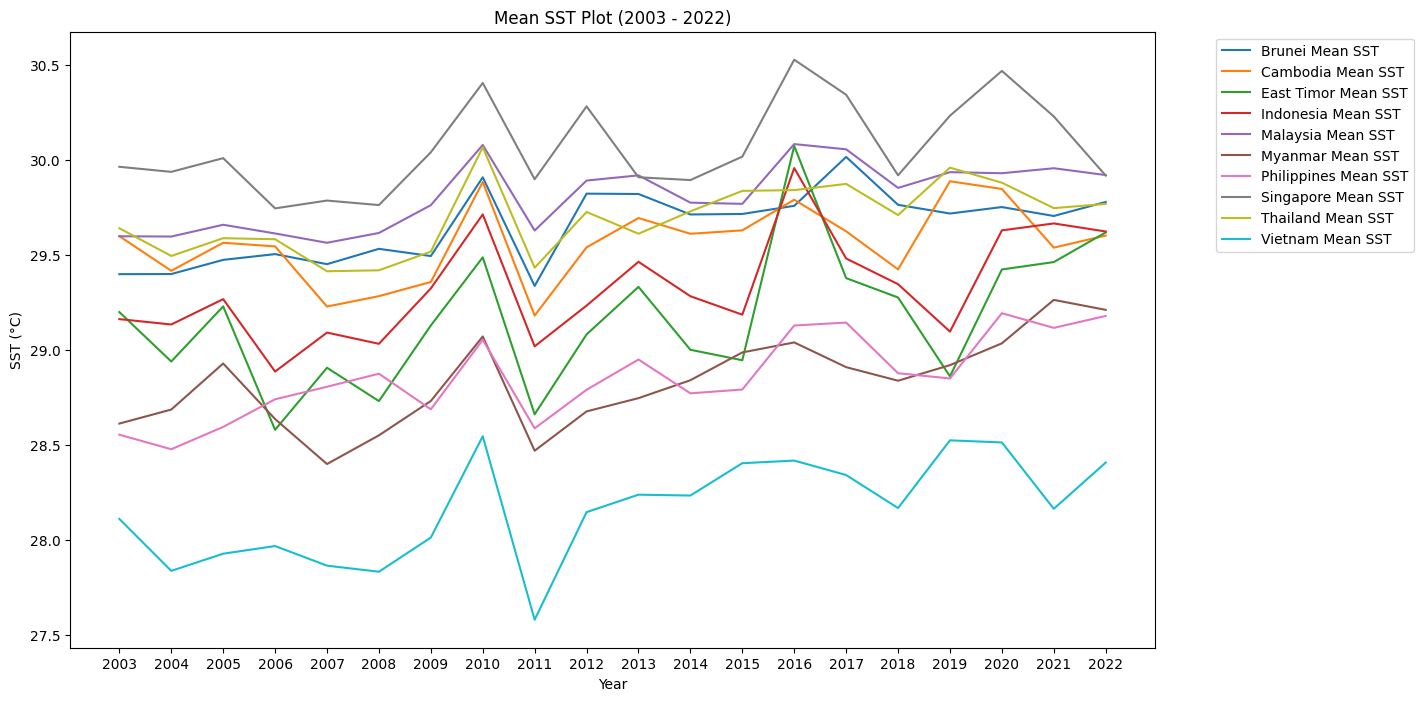

In [14]:
# Plot (all 10 countries mean SST)
plt.figure(figsize = (14, 8))

for i, country in enumerate(df_sst["Country"].unique()):
    countries = df_sst[df_sst["Country"] == country]
    plt.plot(countries["PERIOD"], countries["Mean SST"], label = f"{country} Mean SST")

plt.xticks(range(int(df_sst["PERIOD"].min()), int(df_sst["PERIOD"].max()) + 1))

plt.title("Mean SST Plot (2003 - 2022)")
plt.xlabel("Year")
plt.ylabel("SST (°C)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## Choosing Fish Species

In [15]:
# Find top 10 fish species in Southeast Asia
value_sum = df_marine.groupby("Species")["VALUE"].sum().reset_index()
value_sum.columns = ["Species", "Total Value"]
value_sum.head()

value_sum.to_csv("Southeast Asia Marine Species Captured Sum.csv", index = False)

In [16]:
# Sort value from highest to lowest
value_sum = value_sum.sort_values(by = "Total Value", ascending = False).reset_index(drop = True)
top_10 = value_sum.iloc[:10]

print(top_10)

                     Species   Total Value
0          Marine fishes nei  5.376659e+07
1                  Scads nei  1.216770e+07
2              Skipjack tuna  1.018879e+07
3            Sardinellas nei  7.351414e+06
4       Indian mackerels nei  5.690099e+06
5             Yellowfin tuna  5.510983e+06
6          Common squids nei  5.224675e+06
7             Short mackerel  5.047752e+06
8  Stolephorus anchovies nei  5.018339e+06
9                   Kawakawa  4.718396e+06


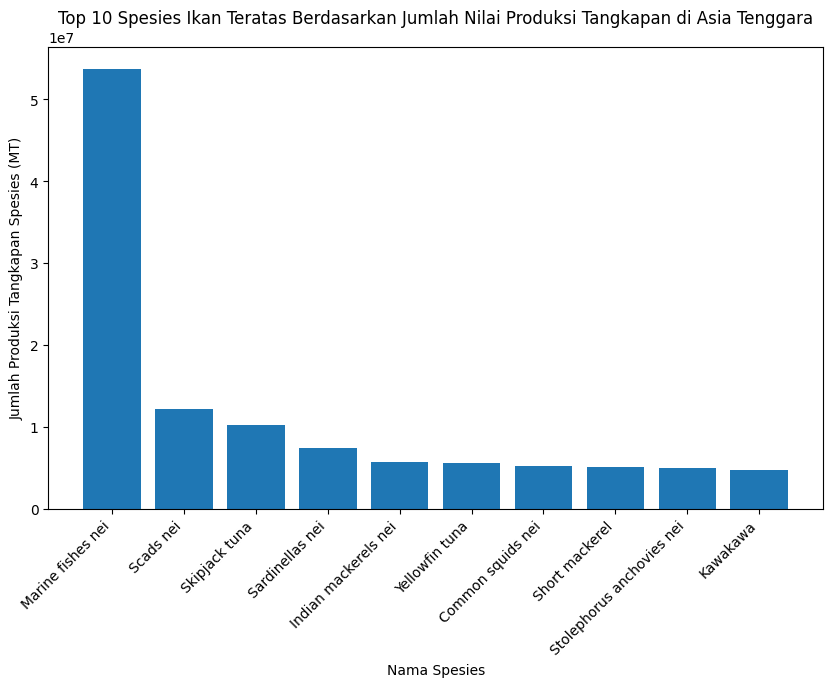

In [17]:
# Plot
plt.figure(figsize = (10, 6))
plt.bar(top_10["Species"], top_10["Total Value"])

plt.xlabel("Nama Spesies")
plt.ylabel("Jumlah Produksi Tangkapan Spesies (MT)")
plt.title("Top 10 Spesies Ikan Teratas Berdasarkan Jumlah Nilai Produksi Tangkapan di Asia Tenggara")
plt.xticks(rotation = 45, ha = "right")
plt.show()

In [18]:
# filter main df to only top 10 fishes
top_10_species = top_10.head(10)["Species"]
df_marine = df_marine[df_marine["Species"].isin(top_10_species)]
top_10_species = df_marine["Species"].unique()

In [19]:
# df_marine.to_csv("Final CSV for Model.csv", index = False)
df_marine.reset_index()

print(df_marine)
print(df_marine.size)

       PERIOD                    Species    Country       VALUE   Mean SST  \
1        2003          Marine fishes nei   Cambodia   33228.693  29.600625   
56       2003  Stolephorus anchovies nei  Indonesia   60188.000  29.164124   
57       2003  Stolephorus anchovies nei  Indonesia  100953.000  29.164124   
70       2003                   Kawakawa  Indonesia   20705.000  29.164124   
71       2003                   Kawakawa  Indonesia  163159.000  29.164124   
...       ...                        ...        ...         ...        ...   
15649    2022          Marine fishes nei   Thailand       0.000  29.770565   
15650    2022          Marine fishes nei   Thailand  118815.050  29.770565   
15651    2022          Marine fishes nei   Thailand  334178.770  29.770565   
15691    2022          Common squids nei   Thailand    7003.780  29.770565   
15692    2022          Common squids nei   Thailand   63612.320  29.770565   

       Min SST  Max SST  
1        28.44    31.80  
56       22

## Check for Species in Southeast Asian Countries

In [21]:
# Myanmar
df_myanmar = df_marine[df_marine["Country"] == "Myanmar"]
myanmar_species = df_myanmar["Species"].unique()
print(myanmar_species)

# Kawakawa data only available for 2008
kawakawa_mn = df_marine[(df_marine["Country"] == "Myanmar") & (df_marine["Species"] == "Kawakawa")]
print(kawakawa_mn)

['Marine fishes nei' 'Kawakawa']
      PERIOD   Species  Country  VALUE   Mean SST  Min SST  Max SST
4077    2008  Kawakawa  Myanmar    9.0  28.552556    24.37    31.36


In [22]:
# Cambodia
df_cambodia = df_marine[df_marine["Country"] == "Cambodia"]
cambodia_species = df_cambodia["Species"].unique()
print(cambodia_species)

['Marine fishes nei']


In [23]:
# Indonesia
df_indonesia = df_marine[df_marine["Country"] == "Indonesia"]
indonesia_species = df_indonesia["Species"].unique()
print(indonesia_species)

# Check for Sardinellas nei and Indian mackerels nei (both are available only from 2019)
sardinellas_id = df_marine[(df_marine["Country"] == "Indonesia") & (df_marine["Species"] == "Sardinellas nei")]
print(sardinellas_id)

indian_id = df_marine[(df_marine["Country"] == "Indonesia") & (df_marine["Species"] == "Indian mackerels nei")]
print(indian_id)

['Stolephorus anchovies nei' 'Kawakawa' 'Skipjack tuna' 'Yellowfin tuna'
 'Scads nei' 'Short mackerel' 'Marine fishes nei' 'Common squids nei'
 'Sardinellas nei' 'Indian mackerels nei']
       PERIOD          Species    Country      VALUE   Mean SST  Min SST  \
12343    2019  Sardinellas nei  Indonesia   6271.878  29.098526    21.74   
12344    2019  Sardinellas nei  Indonesia   5959.110  29.098526    21.74   
13209    2020  Sardinellas nei  Indonesia  13117.128  29.631132    24.37   
13210    2020  Sardinellas nei  Indonesia  14573.368  29.631132    24.37   
14076    2021  Sardinellas nei  Indonesia   9033.349  29.667584    24.37   
14077    2021  Sardinellas nei  Indonesia  16704.707  29.667584    24.37   
14953    2022  Sardinellas nei  Indonesia  10456.437  29.625258    24.22   
14954    2022  Sardinellas nei  Indonesia  12275.493  29.625258    24.22   

       Max SST  
12343    35.00  
12344    35.00  
13209    35.00  
13210    35.00  
14076    34.27  
14077    34.27  
14953    3

In [24]:
# Malaysia
df_malaysia = df_marine[df_marine["Country"] == "Malaysia"]
malaysia_species = df_malaysia["Species"].unique()
print(malaysia_species)

['Stolephorus anchovies nei' 'Kawakawa' 'Skipjack tuna' 'Yellowfin tuna'
 'Indian mackerels nei' 'Marine fishes nei']


In [25]:
# Philippines
df_philippines = df_marine[df_marine["Country"] == "Philippines"]
philippines_species = df_philippines["Species"].unique()
print(philippines_species)

['Sardinellas nei' 'Stolephorus anchovies nei' 'Kawakawa' 'Skipjack tuna'
 'Yellowfin tuna' 'Scads nei' 'Short mackerel' 'Marine fishes nei'
 'Common squids nei']


In [26]:
# Singapore
df_singapore = df_marine[df_marine["Country"] == "Singapore"]
singapore_species = df_singapore["Species"].unique()
print(singapore_species)

['Skipjack tuna' 'Scads nei' 'Indian mackerels nei' 'Marine fishes nei'
 'Common squids nei']


In [27]:
# Thailand
df_thailand = df_marine[df_marine["Country"] == "Thailand"]
thailand_species = df_thailand ["Species"].unique()
print(thailand_species)

['Sardinellas nei' 'Kawakawa' 'Skipjack tuna' 'Yellowfin tuna'
 'Indian mackerels nei' 'Marine fishes nei' 'Common squids nei']
